In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import pymysql

In [2]:
connection = pymysql.connect(
    db=os.environ["db_name"],
    user=os.environ["db_user"],
    passwd=os.environ["db_pass"],
    host=os.environ["db_host"],
    port=3306,
    cursorclass=pymysql.cursors.DictCursor,
)
cursor = connection.cursor()
query = """
    SELECT t2.ID,t2.post_title,LENGTH(t2.post_content) as len,t2.post_modified FROM fp_forwardpathway.`wp_mmcp_term_relationships` t1
    JOIN fp_forwardpathway.wp_mmcp_posts t2 ON t1.`object_id`=t2.ID
    WHERE t1.`term_taxonomy_id`=3627
"""
cursor.execute(query)
rows = cursor.fetchall()
df = pd.DataFrame(rows)
cursor.close()
connection.close()

In [3]:
df.post_modified = pd.to_datetime(df.post_modified)

In [4]:
df.set_index("post_modified", inplace=True)

In [5]:
df.sort_index(inplace=True)
df["len_rolling"] = df["len"].rolling("1D").mean()

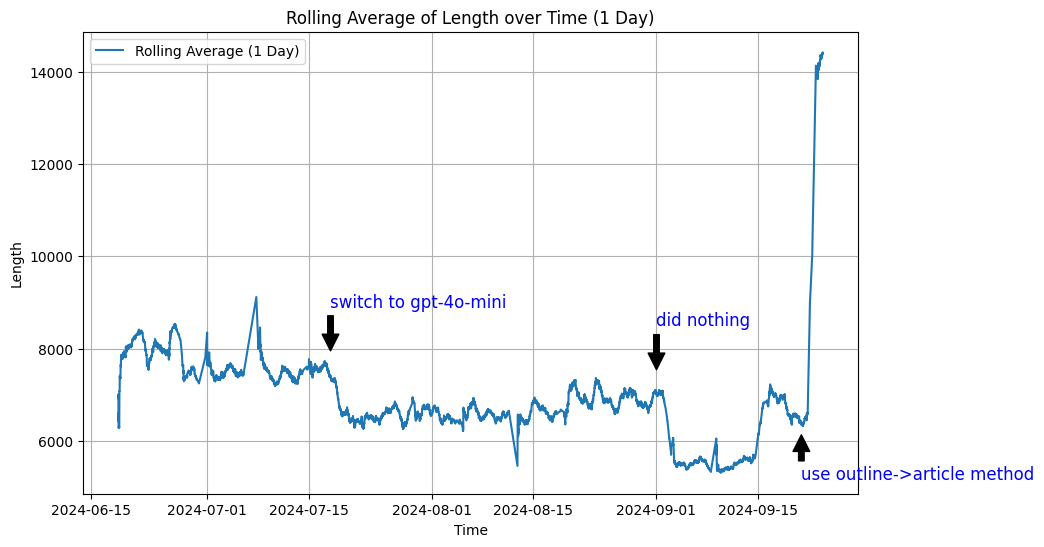

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["len_rolling"], label="Rolling Average (1 Day)")
plt.xlabel("Time")
plt.ylabel("Length")
plt.title("Rolling Average of Length over Time (1 Day)")
plt.legend()
plt.grid(True)

# Interpolate the value at 2024-07-18 if the date is not present
annotation_date = pd.Timestamp("2024-07-18")
annotation_value = (
    df["len_rolling"]
    .reindex(df.index.union([annotation_date]))
    .interpolate(method="time")
    .loc[annotation_date]
)

# Annotating the graph
plt.annotate(
    "switch to gpt-4o-mini",
    xy=(annotation_date, annotation_value + 500),
    xytext=(
        annotation_date,
        annotation_value + 1500,
    ),  # Adjust text position for clarity
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=12,
    color="blue",
)

# Interpolate the value at 2024-07-18 if the date is not present
annotation_date = pd.Timestamp("2024-09-01")
annotation_value = (
    df["len_rolling"]
    .reindex(df.index.union([annotation_date]))
    .interpolate(method="time")
    .loc[annotation_date]
)

# Annotating the graph
plt.annotate(
    "did nothing",
    xy=(annotation_date, annotation_value + 500),
    xytext=(
        annotation_date,
        annotation_value + 1500,
    ),  # Adjust text position for clarity
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=12,
    color="blue",
)


# Interpolate the value at 2024-07-18 if the date is not present
annotation_date = pd.Timestamp("2024-09-21")
annotation_value = (
    df["len_rolling"]
    .reindex(df.index.union([annotation_date]))
    .interpolate(method="time")
    .loc[annotation_date]
)

# Annotating the graph
plt.annotate(
    "use outline->article method",
    xy=(annotation_date, annotation_value - 200),
    xytext=(
        annotation_date,
        annotation_value - 1200,
    ),  # Adjust text position for clarity
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=12,
    color="blue",
)

plt.show()